In [20]:
import pandas as pd
import seaborn as sns
import pylab as pl

In [21]:
d1 = pd.read_csv('BPS_shortP_Mdot0_alpha0.3.csv')
d1['Mdot'] = 0
d2 = pd.read_csv('BPS_shortP_Mdot-1_alpha0.3.csv')
d2['Mdot'] = -1
d3 = pd.read_csv('BPS_shortP_Mdot-2_alpha0.3.csv')
d3['Mdot'] = -2
d4 = pd.read_csv('BPS_shortP_Mdot-3_alpha0.3.csv')
d4['Mdot'] = -3

In [22]:
data = pd.concat([d1, d2, d3, d4])

In [23]:
data

,Unnamed: 0,M1_init,M2_init,q_init,P_init,FeH_init,stability,P_final,q_final,M1_final,M2_final,product,Mdot
0,0,2.397194,1.963390,1.220946,31.108324,0.208605,stable,414.258728,0.242831,0.511581,1.918665,HB,0
1,1,0.814475,0.216962,3.754006,20.372047,-1.448139,merger,0.000000,0.000000,0.000000,0.000000,merger,0
2,2,1.886445,1.013382,1.861533,7.263769,-0.111126,stable,116.846611,0.311018,0.345423,1.037464,He-WD,0
3,3,1.400477,0.323606,4.327719,40.225720,0.184440,merger,0.000000,0.000000,0.000000,0.000000,merger,0
4,4,1.779305,0.545977,3.258937,54.980566,-0.180333,merger,0.000000,0.000000,0.000000,0.000000,merger,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1.273722,0.371015,3.433072,721.122784,-0.386271,CE,1.938627,1.157262,0.555157,0.485765,He-WD,-3
99996,99996,2.122291,1.435090,1.478855,35.857972,-0.031537,stable,437.939148,0.292585,0.417769,1.414553,HB,-3
99997,99997,1.906921,1.619666,1.177355,147.527689,0.075971,stable,1389.682251,0.286748,0.478118,1.623220,HB,-3
99998,99998,1.594146,0.300482,5.305295,93.291764,0.144882,merger,0.000000,0.000000,0.000000,0.000000,merger,-3


In [28]:
data[data['stability'] == 'CE']['product'].value_counts()

He-WD    13114
Name: product, dtype: int64

In [24]:
data['stability'].value_counts()

stable    74953
merger    41933
CE        13114
Name: stability, dtype: int64

In [25]:
data['product'].value_counts()

He-WD     47718
merger    41933
HB        31845
sdB        8504
Name: product, dtype: int64

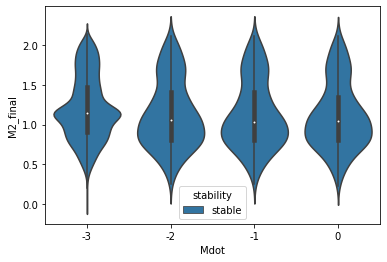

In [26]:
d = data[data['product'] == 'sdB']
d = d[d['stability'].isin(['stable', 'CE'])]
sns.violinplot(x='Mdot', y='M2_final', hue='stability', data=d)